In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [101]:
data = pd.read_csv("iris.csv")
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [102]:
x = data.drop('Species', axis=1)
type(x)

pandas.core.frame.DataFrame

In [103]:
y = data[['Species']]
y
type(y)

pandas.core.frame.DataFrame

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, stratify=y)

In [105]:
x_train.shape

(105, 4)

In [106]:
y_test.shape

(45, 1)

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
model = DecisionTreeClassifier()

In [109]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
# tacnost
y_pred = model.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [112]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [113]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


In [114]:
from sklearn.metrics import classification_report

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [116]:
#---------------------------

In [117]:
data.isna().any()

Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
Species         False
dtype: bool

In [118]:
data.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.117570,0.871754,0.817941
Sepal_Width,-0.117570,1.000000,-0.428440,-0.366126
Petal_Length,0.871754,-0.428440,1.000000,0.962865
Petal_Width,0.817941,-0.366126,0.962865,1.000000


In [119]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [120]:
feature_names = data.columns.to_list()[:-1]

In [121]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

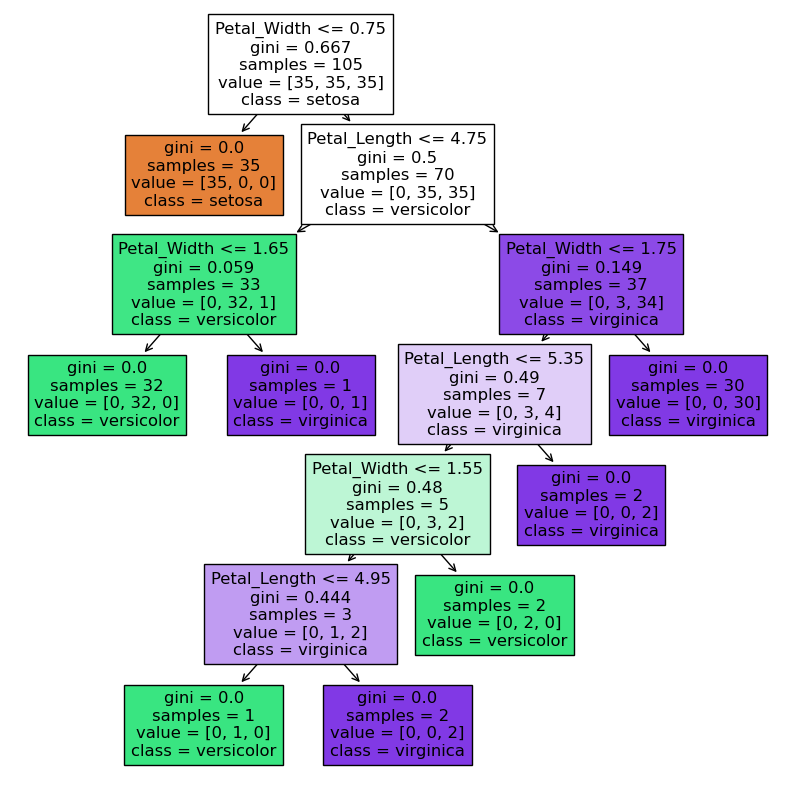

In [122]:
plt.figure(figsize=(10,10))
_ = plot_tree(model, feature_names= feature_names, class_names=model.classes_, filled=True)

In [123]:
from sklearn.model_selection import GridSearchCV

In [129]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4],
    'min_samples_leaf': [2, 3]
}

In [130]:
model_search = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy', cv=5)


In [131]:
model_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 3]},
             scoring='accuracy')

In [132]:
model_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3)

In [133]:
model_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}